In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
def FirstDev(wave=None,x=None,s=None,g=None):
    xx = x.shape[0]
    xy = x.shape[1]
    sd1= np.zeros([xx,xy])
    for i in range(int(s + g / 2 + 0.5), int(xy - s - g / 2 + 0.5)):
        sa=np.mean(x[:,int(i - s - g / 2 + 0.5):int(i - g / 2 - 0.5)], axis = 1)
        sc=np.mean(x[:,int(i + g / 2 + 0.5):int(i + g / 2 - 0.5 + s)], axis = 1)
        sd1[:,i]=sc - sa

    plt.figure(figsize=(10,3))
    plt.subplot(121)
    for i in range (x.shape[0]):  
        plt.plot(wave,x[i])
    plt.xlabel('wavelenght, nm')
    plt.ylabel('log 1/R')
    plt.xlim(np.min(wave),np.max(wave))
    
    plt.subplot(122)
    for i in range (x.shape[0]):  
        plt.plot(wave,sd1[i])
    plt.xlabel('wavelenght, nm')
    plt.ylabel('Log 1/R')
    plt.xlim(np.min(wave),np.max(wave))
    plt.show()
    return sd1

In [3]:
def SecondDev(wave,x,s,g,):
    xx = x.shape[0]
    xy = x.shape[1]
    sd2= np.zeros([xx,xy])
    for i in range(int(np.dot(3 / 2,s) + g + 0.5),int(xy - np.dot(3 / 2,s) - g + 0.5)):
        x_c=np.mean(x[:,int(i + s / 2 + g + 0.5):int(i +  np.dot(3 / 2,s) + g - 0.5)],axis = 1)
        x_a=np.mean(x[:,int(i - np.dot(3 / 2,s) - g + 0.5):int(i - s / 2 - g - 0.5)],axis = 1)
        x_b=np.mean(x[:,int(i - s / 2 + 0.5):int(i + s / 2 - 0.5)],axis = 1)
        sd2[:,i]=(x_c) - np.dot(2,(x_b)) + (x_a)

    plt.figure(figsize=(10,3))
    plt.subplot(121)
    for i in range (x.shape[0]):  
        plt.plot(wave,x[i])
    plt.xlabel('wavelenght, nm')
    plt.ylabel('log 1/R')
    plt.xlim(np.min(wave),np.max(wave))
    
    plt.subplot(122)
    for i in range (x.shape[0]):  
        plt.plot(wave,sd2[i])
    plt.xlabel('wavelenght, nm')
    plt.ylabel('Log 1/R')
    plt.xlim(np.min(wave),np.max(wave))
    plt.show()
    return sd2

In [4]:
def meancen2(wave=None,x=None):
    xx = x.shape[0]
    xy = x.shape[1]
    mean_x=np.sum(x,axis =0)
    mean_x=mean_x / xx
    meand=np.tile(mean_x,(xx,1))
    meanC=(x - meand)
    plt.figure(figsize=(10,3))
    
    plt.subplot(121)
    for i in range (x.shape[0]):  
        plt.plot(wave,x[i])
    plt.xlabel('wavelenght, nm')
    plt.ylabel('log 1/R')
    plt.xlim(np.min(wave),np.max(wave))
    
    plt.subplot(122)
    for i in range (x.shape[0]):  
        plt.plot(wave,meanC[i])
    plt.xlabel('wavelenght, nm')
    plt.ylabel('Log 1/R')
    plt.xlim(np.min(wave),np.max(wave))
    plt.show()
    return meanC

In [5]:
def snv(wave,x):
    xx = x.shape[0]
    xy = x.shape[1]
    mean_x=np.mean(x,axis =1)
    std_d=np.std(x,axis=1)
    meand=np.tile(mean_x,(xy,1)).T
    stdd=np.tile(std_d,(xy,1)).T
    
    snv_data= (x - meand) / stdd
    
    plt.figure(figsize=(10,3))
    plt.subplot(121)
    for i in range (x.shape[0]):  
        plt.plot(wave,x[i])
    plt.xlabel('wavelenght, nm')
    plt.ylabel('log 1/R')
    plt.xlim(np.min(wave),np.max(wave))
    
    plt.subplot(122)
    for i in range (x.shape[0]):  
        plt.plot(wave,snv_data[i])
    plt.xlabel('wavelenght, nm')
    plt.ylabel('Log 1/R')
    plt.xlim(np.min(wave),np.max(wave))
    plt.show()
    return snv_data

In [6]:
def msc(sp,nargout=1):
    if nargout == 1:
        nos = x.shape[0]
        wave = x.shape[1]
        meansp=np.mean(sp,axis=0)
        lbd=np.array(range(0,wave))
        Ym=np.polyfit(lbd,meansp,1)
        slopem=Ym[0]
        interm=Ym[1]
        Y=np.zeros([nos,2])
        for i in range(0,nos):
            Y[i,:]=np.polyfit(lbd,sp[i,:],1)
        slope=np.tile(Y[:,0],(wave,1)).T
        inter=np.tile(Y[:,1],(wave,1)).T
        spmsc=(sp - inter) / slope
        spmsc=np.multiply(spmsc,slopem) + np.tile(interm,(nos,wave))
        return spmsc
    
    if nargout == 2:
        nos = x.shape[0]
        wave = x.shape[1]
        meansp=np.mean(sp,axis=0)
        lbd=np.array(range(0,wave))
        
        Ym=np.polyfit(lbd,meansp,1)
        mscval=np.copy(Ym)
        slopem=Ym[0]
        interm=Ym[1]
        Y=np.zeros([nos,2])
        for i in range(0,nos):
            Y[i,:]=np.polyfit(lbd,sp[i,:],1)
        slope=np.tile(Y[:,0],(wave,1)).T
        inter=np.tile(Y[:,1],(wave,1)).T
        spmsc=(sp - inter) / slope
        spmsc=np.multiply(spmsc,slopem) + np.tile(interm,(nos,wave))
        return spmsc,mscval

In [7]:
X = pd.read_excel('TEST_S5G5.xlsx', sheet_name='X', header = None)

In [8]:
wl = pd.read_excel('TEST_S5G5.xlsx', sheet_name='wl', header = None)

In [9]:
wave = np.array(wl).reshape(-1)

In [10]:
x = np.array(X)

In [11]:
s =5
g= 5

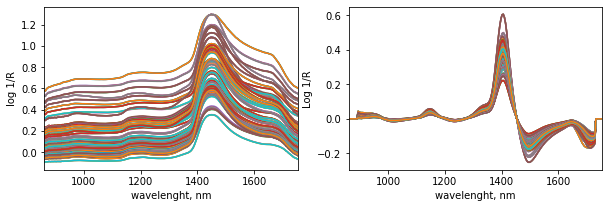

In [12]:
FirstDev(wave,x,s,g);

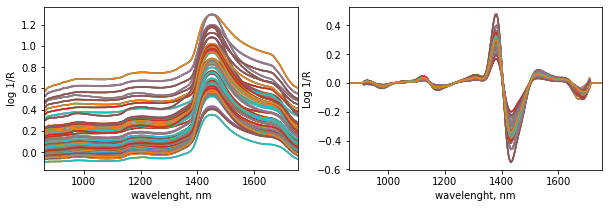

In [13]:
SecondDev(wave,x,s,g);

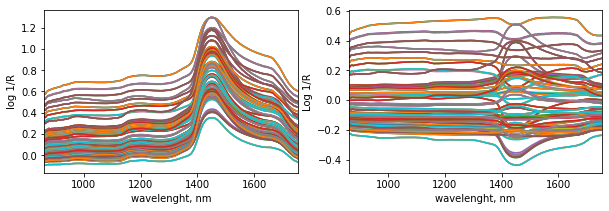

In [14]:
meancen2(wave,x);

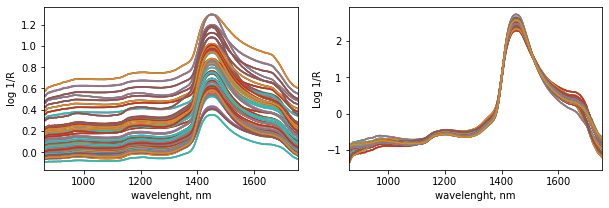

In [15]:
snv(wave,x);

In [16]:
spmsc = msc(x)
print(spmsc)

[[0.13728705 0.13159282 0.13993979 ... 0.18448366 0.17899019 0.17154496]
 [0.13801906 0.13166416 0.14013002 ... 0.18441669 0.17929159 0.17192774]
 [0.13793948 0.13170072 0.13997595 ... 0.18445468 0.17923184 0.17153291]
 ...
 [0.15099276 0.15406952 0.15553341 ... 0.20156741 0.19635841 0.18983608]
 [0.15097883 0.1540665  0.15533793 ... 0.20136892 0.19625605 0.18976289]
 [0.15073421 0.15379119 0.15546407 ... 0.20141359 0.19611845 0.18965282]]


In [17]:
spmsc,mscval = msc(x,nargout = 2)
print(spmsc,mscval)

[[0.13728705 0.13159282 0.13993979 ... 0.18448366 0.17899019 0.17154496]
 [0.13801906 0.13166416 0.14013002 ... 0.18441669 0.17929159 0.17192774]
 [0.13793948 0.13170072 0.13997595 ... 0.18445468 0.17923184 0.17153291]
 ...
 [0.15099276 0.15406952 0.15553341 ... 0.20156741 0.19635841 0.18983608]
 [0.15097883 0.1540665  0.15533793 ... 0.20136892 0.19625605 0.18976289]
 [0.15073421 0.15379119 0.15546407 ... 0.20141359 0.19611845 0.18965282]] [0.00161322 0.1374159 ]
